# Written map task: analysis

Juan Berrios | juanberrios@pitt.edu | Last updated: October 27, 2022

**Summary and overview of the data:**

- The purpose of this project is to do an analysis of the results of a map task being piloted for a study on code-switching. This pilot was conducted using only one language, either English or Spanish. In this second notebook I keep processing the data and extracting relevant features using NLP techniques. I finish with a descriptive analysis.

**Contents:**

1. [Preparations](#1.-Preparations): includes the necessary preparations, including importing libraries and loading files.
2. [Extracting information](#2.-Extracting-information): extracting the features of interest using NLTK.
3. [Descriptive analysis](#3.-Descriptive-analysis): a description of results as tallied by language, session, and participant.
4. [Summary](#4.-Summary): a summary of the results with a focus on linguistic features.

## 1. Preparations

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import pickle, nltk
from matplotlib import pyplot as plt
import seaborn as sns

#seaborn settings
sns.set(font_scale=2)
sns.set_style("whitegrid")

#Releasing all output:                                            
from IPython.core.interactiveshell import InteractiveShell #Prints all commands rather than the last one.
InteractiveShell.ast_node_interactivity = "all"

#Turning pretty print off:
%pprint

Pretty printing has been turned OFF


In [2]:
#Loading files

df = pd.read_excel('./spreadsheets/df.xlsx')
df.shape

(2107, 6)

## 2. Extracting information

In [3]:
df.head(10) #A reminder of what the data look like

,turn,time,participant,language,session,date
0,Start behind the surfer with the board overhead,9:48:23 pm,A1,English,one,07/06/2021
1,Curve around the surfer’s feet,9:48:23 pm,A1,English,one,07/06/2021
2,"Then go towards the water at a slight angle, e...",9:48:23 pm,A1,English,one,07/06/2021
3,Should I stop at the waters edge?,9:50:02 pm,B1,English,one,07/06/2021
4,Nope,9:50:09 pm,A1,English,one,07/06/2021
5,Slight curve to the blue water. At the level o...,9:50:09 pm,A1,English,one,07/06/2021
6,"Yinz got it, neat?",9:51:14 pm,A1,English,one,07/06/2021
7,*n’at,9:51:14 pm,A1,English,one,07/06/2021
8,Reddy for the next steps n’at?,9:51:14 pm,A1,English,one,07/06/2021
9,I'm in front of the pink dolphin,9:51:38 pm,B1,English,one,07/06/2021


In [4]:
df['turn'].iloc[0] #What the very first turn looks like. 

'Start behind the surfer with the board overhead'

- To start operations on the whole data frame let's first lowercase the turn column (where necessary): 

In [5]:
df['turn'] = df['turn'].map(lambda x: x.lower())

In [6]:
df['turn'].sample(10) #Sample. Looks good

1847                                                  ajá
21      once you’re at the chair, go south along the t...
693                                                    ok
411                         curve under the bench i meant
727     go down and under their feet arching over the ...
884     luego vas a seguir entre los arbustos y el ten...
1743                                              derecho
1927                                   ok. ya quedó listo
592                                                     k
772                                    diagonal? o recto?
Name: turn, dtype: object

- Now tokenizing: 

In [7]:
toks = df['turn'].map(nltk.word_tokenize) 

In [8]:
type(toks)
toks[:10] #sample

<class 'pandas.core.series.Series'>

0    [start, behind, the, surfer, with, the, board,...
1             [curve, around, the, surfer, ’, s, feet]
2    [then, go, towards, the, water, at, a, slight,...
3          [should, i, stop, at, the, waters, edge, ?]
4                                               [nope]
5    [slight, curve, to, the, blue, water, ., at, t...
6                          [yinz, got, it, ,, neat, ?]
7                                        [*, n, ’, at]
8          [reddy, for, the, next, steps, n, ’, at, ?]
9           [i, 'm, in, front, of, the, pink, dolphin]
Name: turn, dtype: object

In [9]:
df['tokens'] = toks #Might come back and examine if a by-language tokenizing is necessary, right now it doesn't appear 
                    #to be so

In [10]:
df[["turn", "tokens"]].sample(10) #A sample. Now that I'm just seeing the columns of interest. Looks good.

,turn,tokens
668,ok,[ok]
614,good to go now!,"[good, to, go, now, !]"
2102,ahora haras una linea encima del tronco hasta ...,"[ahora, haras, una, linea, encima, del, tronco..."
1528,alright,[alright]
307,don't wrap around the frog,"[do, n't, wrap, around, the, frog]"
2036,entre los cactus pequeñitos,"[entre, los, cactus, pequeñitos]"
1313,start on bottom right side underneath dog to t...,"[start, on, bottom, right, side, underneath, d..."
342,"curve to the left of the builder,","[curve, to, the, left, of, the, builder, ,]"
1042,"sigues el camino, por debajo de la buena perso...","[sigues, el, camino, ,, por, debajo, de, la, b..."
896,y vas a cruzar a la siguiente isla en diagonal...,"[y, vas, a, cruzar, a, la, siguiente, isla, en..."


In [11]:
df['token_count'] = df['tokens'].map(len) #Number of tokens per turn

In [12]:
df[["turn", "tokens", "token_count"]].sample(10) #A sample. 

,turn,tokens,token_count
271,walk towards the well,"[walk, towards, the, well]",4
1266,"close enough, maybe :d","[close, enough, ,, maybe, :, d]",6
521,k then you're gonna go diagonal right just to ...,"[k, then, you, 're, gon, na, go, diagonal, rig...",37
1144,then head towards the bottom of the cook,"[then, head, towards, the, bottom, of, the, cook]",8
563,"in sand, about halfway between all three","[in, sand, ,, about, halfway, between, all, th...",8
1623,between the 2 sage brushes onto the path,"[between, the, 2, sage, brushes, onto, the, path]",8
1606,did you drink too much?,"[did, you, drink, too, much, ?]",6
1278,ok done,"[ok, done]",2
1493,i am in the dolphin,"[i, am, in, the, dolphin]",5
366,turn again and walk south between the tent and...,"[turn, again, and, walk, south, between, the, ...",10


In [13]:
df['type_count'] = df['tokens'].apply(lambda x: len(set(x))) #Number of types per turn

In [14]:
df[["turn", "tokens", "type_count"]].sample(10) #A sample. 

,turn,tokens,type_count
1659,r u still sober,"[r, u, still, sober]",4
659,go up and between the sandcastles and the beac...,"[go, up, and, between, the, sandcastles, and, ...",7
2051,"ahora, harás una línea hacia alrededor del per...","[ahora, ,, harás, una, línea, hacia, alrededor...",15
863,ves el perro a la derecha que está sentado al ...,"[ves, el, perro, a, la, derecha, que, está, se...",21
1895,por qué lado del cocodrilo?,"[por, qué, lado, del, cocodrilo, ?]",6
87,hi,[hi],1
83,should i move in between the dog and mud or to...,"[should, i, move, in, between, the, dog, and, ...",13
740,ok,[ok],1
1038,el cactus de lz izq grande?,"[el, cactus, de, lz, izq, grande, ?]",7
1343,okay got it,"[okay, got, it]",3


- Lastly frequency distributions for each row:

In [15]:
df['freq_dist'] = df.tokens.map(nltk.FreqDist) 

In [16]:
df[["turn", "tokens", "freq_dist"]].sample(10) #A sample. 

,turn,tokens,freq_dist
922,"pero hacia afuera de la doctora, hacia el send...","[pero, hacia, afuera, de, la, doctora, ,, haci...","{'pero': 1, 'hacia': 2, 'afuera': 1, 'de': 1, ..."
502,i'm to the right of his right foot,"[i, 'm, to, the, right, of, his, right, foot]","{'i': 1, ''m': 1, 'to': 1, 'the': 1, 'right': ..."
159,yep im there,"[yep, im, there]","{'yep': 1, 'im': 1, 'there': 1}"
110,now take a few steps southeast and stop at 4:00,"[now, take, a, few, steps, southeast, and, sto...","{'now': 1, 'take': 1, 'a': 1, 'few': 1, 'steps..."
1148,"aaah no yes, there is....","[aaah, no, yes, ,, there, is, ....]","{'aaah': 1, 'no': 1, 'yes': 1, ',': 1, 'there'..."
1448,"from the giraffe, cross the two stones towards...","[from, the, giraffe, ,, cross, the, two, stone...","{'from': 1, 'the': 5, 'giraffe': 1, ',': 2, 'c..."
570,"oh, like the east cactus, not eastern cactus","[oh, ,, like, the, east, cactus, ,, not, easte...","{'oh': 1, ',': 2, 'like': 1, 'the': 1, 'east':..."
564,what do you mean by e cactus,"[what, do, you, mean, by, e, cactus]","{'what': 1, 'do': 1, 'you': 1, 'mean': 1, 'by'..."
1920,ok,[ok],{'ok': 1}
1869,de ahi sbiras full recto,"[de, ahi, sbiras, full, recto]","{'de': 1, 'ahi': 1, 'sbiras': 1, 'full': 1, 'r..."


- Saving results:

In [17]:
df.to_excel("./spreadsheets/df_analysis.xlsx", index=False) #Saving as spreadsheet file
df.to_pickle('./pkl/df_analysis.pkl')                       #Pickling

## 3. Descriptive analysis

- Let's start with overall counts:

In [18]:
df.describe() #Continuous variables

,token_count,type_count
count,2107.000000,2107.000000
mean,8.194115,7.261509
std,7.827667,6.173532
min,1.000000,1.000000
25%,2.000000,2.000000
50%,6.000000,6.000000
75%,11.000000,10.000000
max,56.000000,43.000000


- Zooming in on figures of interest:

In [19]:
#Total 

print('Total turns:\n', len(df))
print('Total tokens:\n', np.sum(df['token_count']))
print('Total types:\n', np.sum(df['type_count']), '\n')


#Means and SDs

print('Mean tokens per turn:\n', np.mean(df['token_count']))
print('Standard deviation:\n', np.std(df['token_count']), '\n')
print('Mean types per turn:\n', np.mean(df['type_count']))
print('Standard deviation:\n', np.std(df['type_count']))

Total turns:
 2107
Total tokens:
 17265
Total types:
 15300 

Mean tokens per turn:
 8.194114855244424
Standard deviation:
 7.825809071540651 

Mean types per turn:
 7.261509254864737
Standard deviation:
 6.172066396863771


- By participant:

Turns by participant:
Total:


C1    168
E1    111
S1    105
A1    102
B2    100
E2    100
D1     86
T1     79
F2     77
N1     74
M1     71
B1     70
P1     65
H2     65
F1     62
X1     62
A2     61
G2     58
W1     56
Q1     49
J2     48
I2     48
K1     45
O1     41
R1     39
L1     37
D2     35
H1     34
V1     33
G1     30
Y1     30
U1     27
Z1     26
C2     13
Name: participant, dtype: int64

Relative:


C1    0.079734
E1    0.052682
S1    0.049834
A1    0.048410
B2    0.047461
E2    0.047461
D1    0.040816
T1    0.037494
F2    0.036545
N1    0.035121
M1    0.033697
B1    0.033223
P1    0.030850
H2    0.030850
F1    0.029426
X1    0.029426
A2    0.028951
G2    0.027527
W1    0.026578
Q1    0.023256
J2    0.022781
I2    0.022781
K1    0.021357
O1    0.019459
R1    0.018510
L1    0.017561
D2    0.016611
H1    0.016137
V1    0.015662
G1    0.014238
Y1    0.014238
U1    0.012814
Z1    0.012340
C2    0.006170
Name: participant, dtype: float64

Mean turns by participant:


61.970588235294116

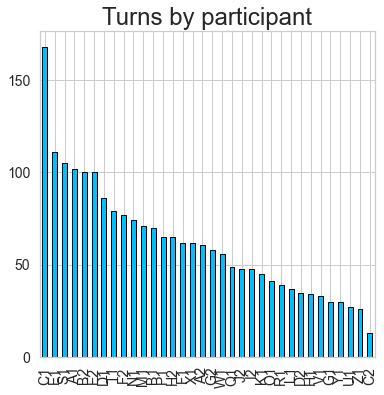

In [20]:
print('Turns by participant:')
print('Total:')
df['participant'].value_counts()
print('Relative:')
df['participant'].value_counts(normalize=True)
print('Mean turns by participant:')
np.mean(df['participant'].value_counts())
df['participant'].value_counts().plot(kind='bar', figsize=(6,6), color=['deepskyblue'], edgecolor="black", fontsize=14, 
                                      title ='Turns by participant')

In [21]:
print('Mean tokens and types each turn by participant:')
df.groupby(['participant']).mean()

Mean tokens and types each turn by participant:


,token_count,type_count
participant,,
A1,8.205882,7.627451
A2,6.360656,5.754098
B1,5.342857,5.157143
B2,7.870000,7.250000
C1,7.744048,7.089286
C2,4.615385,4.153846
D1,3.930233,3.616279
D2,7.542857,7.142857
E1,8.747748,7.900901


- By language:

In [22]:
print('Turns by language:')            #Note that there are more ENG sessions, and that the first ENG 
print('Total:')                        #session included all 8 maps
df['language'].value_counts()          
print('Relative:')
df['language'].value_counts(normalize=True)

Turns by language:
Total:


English    1324
Spanish     783
Name: language, dtype: int64

Relative:


English    0.628382
Spanish    0.371618
Name: language, dtype: float64

Mean tokens and types by language:


,token_count,type_count
language,,
English,8.258308,7.254532
Spanish,8.085568,7.273308


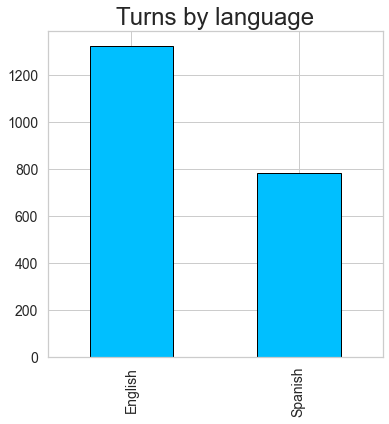

In [23]:
print('Mean tokens and types by language:')
df.groupby(['language']).mean()
df['language'].value_counts().plot(kind='bar', figsize=(6,6), color=['deepskyblue'], edgecolor="black", fontsize=14, 
                                      title ='Turns by language')

Text(28.045, 0.5, 'Tokens per turn')

Text(0.5, 21.92, 'Language')

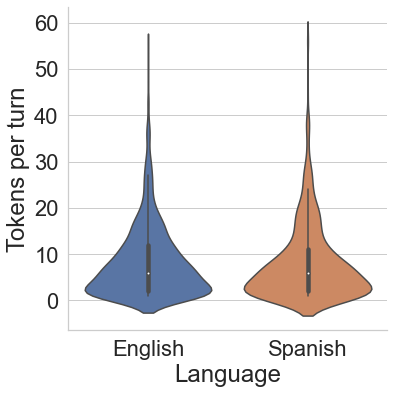

In [24]:
p = sns.catplot(x="language", y="token_count", kind="violin",data=df, height=6, aspect=1)
plt.ylabel('Tokens per turn')
plt.xlabel('Language')

- By session:

Turns by session:
Total:


two         254
ten         184
sixteen     177
three       173
one         172
fourteen    161
seven       145
twenty      123
twelve      118
eight       106
nine         88
six          82
four         64
eleven       60
thirteen     56
nineteen     48
eighteen     48
fifteen      48
Name: session, dtype: int64

Relative:


two         0.120551
ten         0.087328
sixteen     0.084006
three       0.082107
one         0.081633
fourteen    0.076412
seven       0.068818
twenty      0.058377
twelve      0.056004
eight       0.050308
nine        0.041766
six         0.038918
four        0.030375
eleven      0.028477
thirteen    0.026578
nineteen    0.022781
eighteen    0.022781
fifteen     0.022781
Name: session, dtype: float64

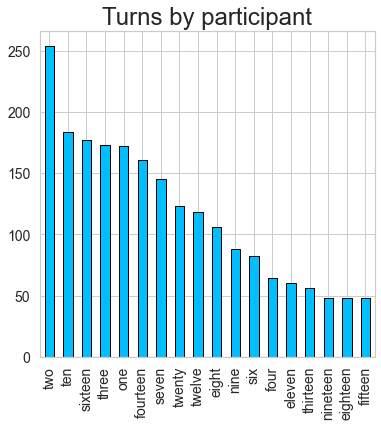

In [25]:
print('Turns by session:')
print('Total:')
df['session'].value_counts()
df['session'].value_counts().plot(kind='bar', figsize=(6,6), color=['deepskyblue'], edgecolor="black", fontsize=14, 
                                      title ='Turns by participant')
print('Relative:')
df['session'].value_counts(normalize=True)

In [26]:
print('Mean tokens and types by session:')
df.groupby(['session']).mean()

Mean tokens and types by session:


,token_count,type_count
session,,
eight,9.028302,8.160377
eighteen,9.687500,8.625000
eleven,11.050000,8.700000
fifteen,6.750000,6.333333
four,6.625000,5.796875
fourteen,7.298137,6.683230
nine,9.113636,8.147727
nineteen,9.687500,8.625000
one,7.040698,6.622093


- I'll finish with frequency distributions (for the full dataset). To get total numbers for the whole data frame we need to unnest (flatten) the `tokens` series. For this purpose we can use Panda's own "explode" function. This must also be done by language:

In [27]:
#Creating subsets for language

eng = df[df.language == "English"]
spa = df[df.language == "Spanish"]

eng.shape
spa.shape

(1324, 10)

(783, 10)

In [28]:
#Unnesting the tokens column

unnested_eng = eng['tokens'].explode()
unnested_spa = spa['tokens'].explode()

In [29]:
#Creating frequency distributions

eng_fd = nltk.FreqDist(unnested_eng)
spa_fd = nltk.FreqDist(unnested_spa)

In [30]:
print('Top 25 words - English')
eng_fd.most_common(25)
print('Top 25 words - Spanish')
spa_fd.most_common(25)

Top 25 words - English


[('the', 1426), ('and', 356), ('of', 292), ('to', 271), (',', 228), ('go', 178), ('then', 159), ('right', 159), ('left', 148), ('you', 140), ('on', 132), ('i', 125), ('in', 121), ('a', 120), ('?', 120), ('it', 103), ('at', 102), ('between', 92), ('ok', 91), ('around', 88), ('top', 80), ('line', 78), ("'s", 77), ('above', 76), ('there', 73)]

Top 25 words - Spanish


[('la', 411), ('de', 264), ('por', 239), ('el', 235), ('y', 235), ('a', 148), (',', 146), ('del', 140), ('que', 96), ('?', 94), ('al', 86), ('ok', 78), ('en', 78), ('hasta', 74), ('las', 66), ('vas', 63), ('un', 55), ('hacia', 54), ('entre', 51), ('sin', 50), ('lado', 49), ('encima', 49), ('.', 48), ('está', 45), ('lo', 42)]

- Without stop words and punctuation:

In [31]:
#Using nltk's lists for both languages

from nltk.corpus import stopwords 
eng_stop = stopwords.words('english')
spa_stop = stopwords.words('spanish')

In [32]:
#English

eng_nosym = [x for x in unnested_eng if x.isalnum()] # removing punctuation
eng_nostop =  [x for x in eng_nosym if x not in eng_stop] #stop words

#Spanish

spa_nosym = [x for x in unnested_spa if x.isalnum()] # removing punctuation
spa_nostop =  [x for x in spa_nosym if x not in spa_stop] #stop words

In [33]:
#Creating new frequency distributions

eng_nostop_fd = nltk.FreqDist(eng_nostop)
spa_nostop_fd = nltk.FreqDist(spa_nostop)

Top 25 non-stop words - English


[('go', 178), ('right', 159), ('left', 148), ('ok', 91), ('around', 88), ('top', 80), ('line', 78), ('towards', 66), ('side', 66), ('curve', 62), ('bridge', 62), ('head', 61), ('start', 58), ('going', 50), ('okay', 47), ('rock', 45), ('path', 44), ('stop', 43), ('turn', 41), ('done', 41), ('got', 39), ('make', 37), ('draw', 36), ('cross', 35), ('map', 35), ('walk', 35), ('bottom', 35), ('straight', 34), ('cactus', 34), ('south', 33), ('corner', 33), ('end', 32), ('like', 32), ('past', 31), ('across', 31), ('keep', 30), ('diagonal', 29), ('tree', 29), ('way', 29), ('parrot', 28), ('pass', 27), ('tent', 27), ('lobster', 27), ('island', 26), ('ready', 25), ('north', 25), ('car', 25), ('one', 24), ('yes', 24), ('k', 24)]

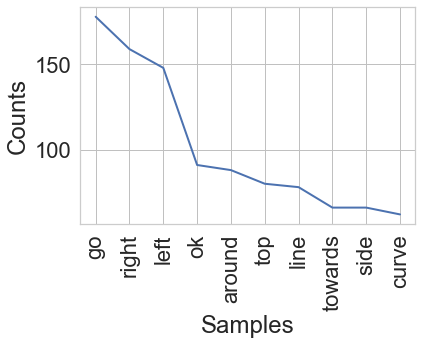

Top 25 non-stop words - Spanish


[('ok', 78), ('vas', 63), ('hacia', 54), ('lado', 49), ('encima', 49), ('izquierda', 42), ('listo', 42), ('abajo', 42), ('pasas', 42), ('parte', 41), ('luego', 38), ('derecha', 35), ('tocar', 31), ('ahí', 30), ('debajo', 29), ('bajas', 28), ('pasar', 28), ('subes', 27), ('ahora', 26), ('tronco', 24), ('línea', 23), ('justo', 22), ('arriba', 22), ('izquierdo', 21), ('dos', 20), ('perro', 20), ('camino', 20), ('grande', 19), ('sigues', 19), ('medio', 19), ('casa', 19), ('después', 19), ('rodeas', 18), ('puente', 18), ('llegar', 16), ('superior', 16), ('x', 16), ('bordea', 16), ('cactus', 15), ('tienda', 14), ('si', 14), ('pasa', 13), ('hospital', 13), ('diagonal', 12), ('mapa', 11), ('esquina', 11), ('guitarra', 11), ('piedras', 11), ('sigue', 11), ('cocodrilo', 11)]

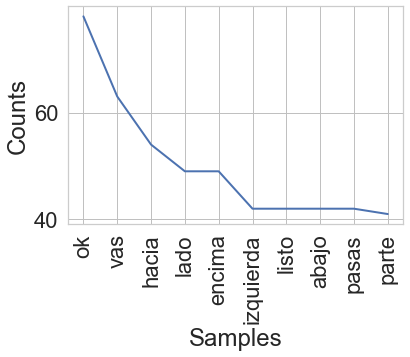

In [34]:
print('Top 25 non-stop words - English')
eng_nostop_fd.most_common(50)
eng_nostop_fd.plot(10)
print('Top 25 non-stop words - Spanish')
spa_nostop_fd.most_common(50)
spa_nostop_fd.plot(10)

In [35]:
#Cardinal points in English

"north" in eng_nostop
"south" in eng_nostop
"east" in eng_nostop
"west" in eng_nostop

#Cardinal points in Spanish

"norte" in spa_nostop
"sur" in spa_nostop
"este" in spa_nostop
"oeste" in spa_nostop

True

True

True

True

False

False

False

False

## 4. Summary

- **In general**:
    - There are 1,446 turns and 12089 tokens in total. There are 10713 types. Note that the latter figure might be inflated by typos/alternate spelling which can be removed in later processing. The difference between types and token is small as turns are normally short. When considering both languages, the mean lenght of a turn is 8.36 tokens, with a relatively high standard deviation of 7.91, although this could be skewed by abundance of short turns indicating confirmation (e.g., "ok"). 
- **Participant**:
    - Some participants were noticeably more chatty than others, other this could be affected by the maps they used, as well as their interpersonal relationship. The mean number of turns per participant was 69.94.
- **Language**:
    - The data are currently composed primarily of English session tokens so it's more appropriate to look at means. Overall it appears that Spanish turns were longer, with a mean token count og 8.90. English turns had a mean token count of 8.19. 
- **Lexis**:
    - After stripping the frequency distributions of stop words, it appears that the most commonly used words are those used to give directions. Examples from English are "go", "right", "left", and "around". Examples from Spanish are "vas", "hacia", and "encima". There are also references to elements from the maps among the most commonly used words, such as "bridge", "map", and "tree". It's also worth noting that the most common words in both languages are equivalent.